<a href="https://colab.research.google.com/github/mffg1993/LabToolsForNewbiesWithPython/blob/main/SignalProcessingForOpticsLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Tutorial 3: Signal Processing for Optics Labs
Fourier Transforms, Filtering, and Smoothing in Python

## 🔧 Introduction
In optics labs, you often work with time-domain or spatial signals — like interferograms, spectra, or beam profiles. Processing these signals helps reduce noise, extract features, or move between time/space and frequency domains.

In this tutorial, we’ll cover:

1.   Discrete Fourier Transforms (np.fft)
2.   Filtering signals (Gaussian & Butterworth)
3.   Smoothing (moving averages)

## 1. 🌊 Simulating a 1D Signal (Fringes + Noise)
Let’s create a noisy signal that mimics an optical interferogram.

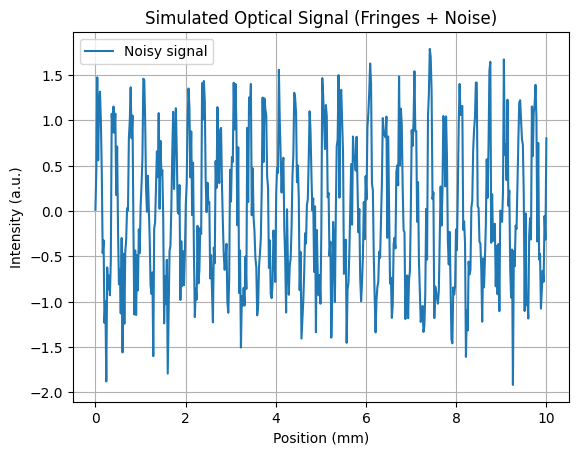

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a noisy sinusoidal signal (e.g., interference fringes)
x = np.linspace(0, 10, 500)
signal = np.sin(2 * np.pi * 3 * x) + 0.4 * np.random.randn(len(x))

plt.plot(x, signal, label='Noisy signal')
plt.title("Simulated Optical Signal (Fringes + Noise)")
plt.xlabel("Position (mm)")
plt.ylabel("Intensity (a.u.)")
plt.grid(True)
plt.legend()
plt.show()


## 2. ⚙️ Fourier Transform using np.fft
Now let’s move to the frequency domain using the Discrete Fourier Transform.

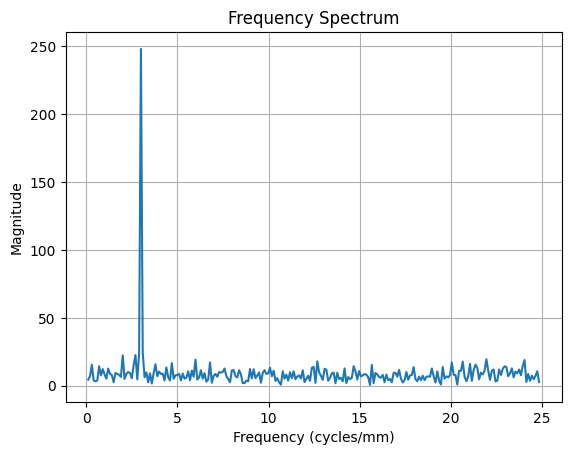

In [2]:
# Perform FFT
fft_signal = np.fft.fft(signal)
freq = np.fft.fftfreq(len(x), d=(x[1] - x[0]))  # frequency axis
magnitude = np.abs(fft_signal)

# Plot positive frequencies
mask = freq > 0
plt.plot(freq[mask], magnitude[mask])
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (cycles/mm)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


## 3. 🧼 Low-Pass Filtering in the Frequency Domain
Let’s remove high-frequency noise by zeroing out high-frequency components.

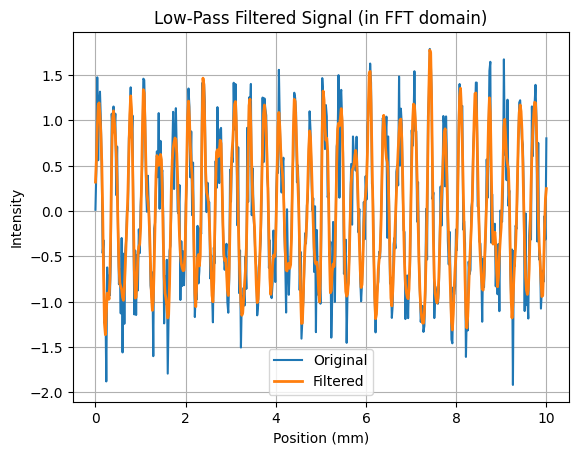

In [3]:
# Copy FFT and zero out frequencies > cutoff
cutoff = 10  # adjust as needed
fft_filtered = fft_signal.copy()
fft_filtered[np.abs(freq) > cutoff] = 0

# Inverse FFT to get back the smoothed signal
signal_filtered = np.fft.ifft(fft_filtered)

plt.plot(x, signal, label='Original')
plt.plot(x, signal_filtered.real, label='Filtered', linewidth=2)
plt.title("Low-Pass Filtered Signal (in FFT domain)")
plt.xlabel("Position (mm)")
plt.ylabel("Intensity")
plt.legend()
plt.grid(True)
plt.show()


## 4. 🔺 High-Pass Filtering
High-pass filters remove low-frequency components (slow drifts or background illumination) while preserving fast variations (like sharp fringes or modulation).

**Use case in optics:** Removing a slow-varying background from an interferometric signal to isolate fast fringes.

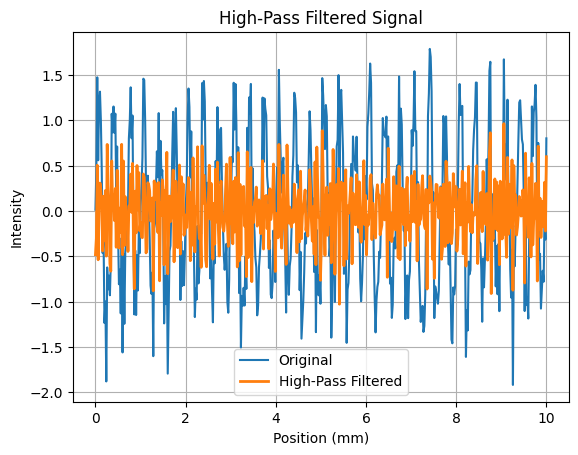

In [6]:
# High-pass filter: zero out low frequencies
cutoff = 5  # remove frequencies below this threshold
fft_highpass = fft_signal.copy()
fft_highpass[np.abs(freq) < cutoff] = 0

# Inverse FFT to get back the signal
signal_highpass = np.fft.ifft(fft_highpass)

plt.plot(x, signal, label='Original')
plt.plot(x, signal_highpass.real, label='High-Pass Filtered', linewidth=2)
plt.title("High-Pass Filtered Signal")
plt.xlabel("Position (mm)")
plt.ylabel("Intensity")
plt.legend()
plt.grid(True)
plt.show()


## 5. 🔳 Band-Pass Filtering
A band-pass filter removes both low and high frequencies — keeping only a specific frequency band.


**Use case in optics:** Isolating a modulation frequency from a laser beat note or frequency comb, or filtering out unwanted spectral leakage in holography.



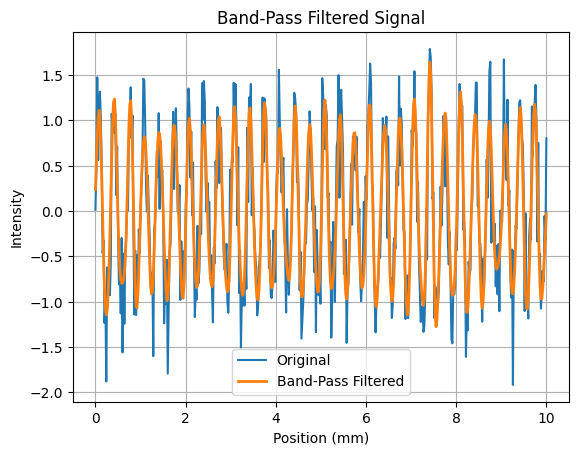

In [7]:
# Band-pass filter: keep only frequencies between lowcut and highcut
lowcut = 2
highcut = 6
fft_bandpass = fft_signal.copy()
mask = (np.abs(freq) < lowcut) | (np.abs(freq) > highcut)
fft_bandpass[mask] = 0

# Inverse FFT
signal_bandpass = np.fft.ifft(fft_bandpass)

plt.plot(x, signal, label='Original')
plt.plot(x, signal_bandpass.real, label='Band-Pass Filtered', linewidth=2)
plt.title("Band-Pass Filtered Signal")
plt.xlabel("Position (mm)")
plt.ylabel("Intensity")
plt.legend()
plt.grid(True)
plt.show()


## 6. 🧪 Gaussian Filtering (in time/space domain)
Another option: convolve the signal with a Gaussian kernel using scipy.ndimage.

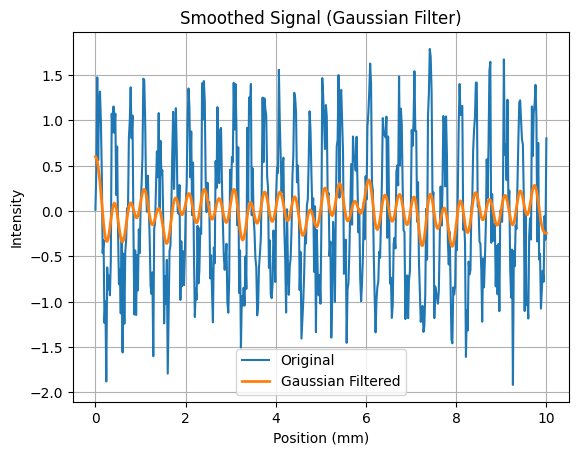

In [4]:
from scipy.ndimage import gaussian_filter1d

gauss_filtered = gaussian_filter1d(signal, sigma=5)

plt.plot(x, signal, label='Original')
plt.plot(x, gauss_filtered, label='Gaussian Filtered', linewidth=2)
plt.title("Smoothed Signal (Gaussian Filter)")
plt.xlabel("Position (mm)")
plt.ylabel("Intensity")
plt.legend()
plt.grid(True)
plt.show()


## 7. 🧹 Smoothing with a Moving Average
This is a simple way to reduce high-frequency noise.

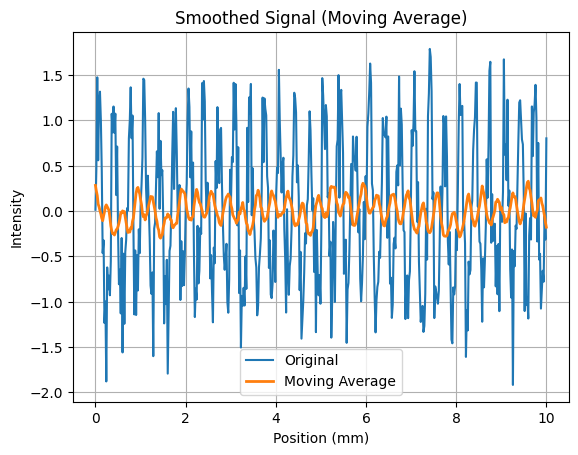

In [5]:
def moving_average(y, window_size):
    return np.convolve(y, np.ones(window_size)/window_size, mode='same')

smoothed = moving_average(signal, window_size=20)

plt.plot(x, signal, label='Original')
plt.plot(x, smoothed, label='Moving Average', linewidth=2)
plt.title("Smoothed Signal (Moving Average)")
plt.xlabel("Position (mm)")
plt.ylabel("Intensity")
plt.legend()
plt.grid(True)
plt.show()
